# Sentiment analysis on IMDB reviews

## Loading data

We will first load the [publicly available dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) using the following code - 

In [33]:
from keras.datasets import imdb

top_words = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Let us now inspect the training data and we can go by the hypothesis test data will not be vastly different in nature than the train_data.

In [34]:
(x_train, y_train)

(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
        list([1, 194, 1153, 194, 8255, 78, 22

The first thing we notice here is, there is no text! It is all numbers. It is so, because neural networks work with numbers and not text. Thus, the dataset has already encoded the data the text in numbers. The way this encoding has happened is narrated in this picture - 

<img src="https://docs.microsoft.com/en-us/learn/student-evangelism/analyze-review-sentiment-with-keras/media/2-keras-docs.png" alt="Keras dataset documentation on IMDB reviews" />

As we realize by now these encoded text, let us take a look at the dictionary

In [35]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Let us now get the word corresponding to any code; i.e. reverse encode the value based on the number

In [36]:
def get_reverse_encode() :
    word_dict = imdb.get_word_index()
    word_dict = {key:(value+3) for key, value in word_dict.items()}
    word_dict[''] = 0 #Padding at the start
    word_dict['>'] = 1 #Starting of the review
    word_dict['?'] = 2 #Unknown word
    reverse_word_dict = {value:key for key, value in word_dict.items()}
    return reverse_word_dict

print(' '.join(get_reverse_encode()[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [37]:
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In the line above we have ensure all reviews are of constant length 500 words with reviews which are shorter are padded with 0 which is a reserved word for the operation

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


Code above constructs the neural network i.e. configures the neural network. It defines the layers and its annexed configuration. Here we have configured 5 layers. The layer that we start with is Embedding. The layer is critical for any neural network that intends to process word corpus. Functionally the layer maps a multidimensional large integer baesd array to a restricted floating point array which subsequent layers can process easily. Embedding is followed by Flatten and few Dense layer. Flatten layer is bridge that translates output of Embedding to layers that follows.
The Dense layers are fully connected neurons of size 16. These happen to be basic kind of neural network with 16 neurons. The number 16 is arbitrary however, we will have to tune the numbers by inspecting the results of training.

In [39]:
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=2, batch_size=128)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 23s 931us/step - loss: 0.5904 - accuracy: 0.6396 - val_loss: 0.3254 - val_accuracy: 0.8624
Epoch 2/2
25000/25000 [==============================] - 22s 886us/step - loss: 0.2254 - accuracy: 0.9110 - val_loss: 0.2898 - val_accuracy: 0.8766


BY calling the fit function we are training the network on the training data. Training is repeated 5 times which is known as epoch. During the run of training the model passes data back and forth through the neurons to tune the parameters. For each epoch an accuracy score is generated. Though during 1 epoch the validation accuracy increases but a higher value for both training accuracy and validation accuracy increases the risk of overfitting a model. To visualize this risk let us plot these values through epochs

[]

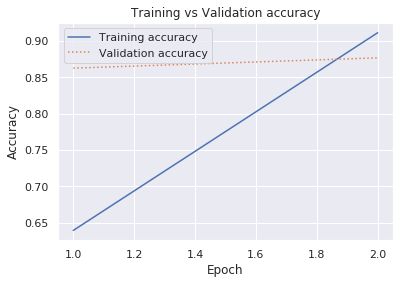

In [40]:
%matplotlib inline
import matplotlib.pyplot as mpl
import seaborn as sns

sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc)+1)

mpl.plot(epochs, acc, '-', label='Training accuracy')
mpl.plot(epochs, val_acc, ':', label='Validation accuracy')
mpl.title('Training vs Validation accuracy')
mpl.xlabel('Epoch')
mpl.ylabel('Accuracy')
mpl.legend(loc='upper left')
mpl.plot()

Let us make observation from this graph but progress to make prediction and judge the accuracy of such predictions. Let us not forget to remind ourselves prediction accuracy is just another metric of model performing. It should not be used in isolation to select a model.

In [41]:
scores = model.evaluate(x_test, y_test)
print('Model accuracy - %.2f%%' % (scores[1]*100))

25000/25000 [==============================] - 7s 280us/step
Model accuracy - 87.66%
